In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read(fpath):
    try:
        with open(fpath) as f:
            flines = f.readlines()
    except:
        return None
    len_flines = len(flines)
    n_vals = [flines[i] for i in range(0, len_flines,3)]
    n_vals = [int(num) for num in n_vals]
    avg_vecs = [flines[i] for i in range(1,len_flines,3)]
    max_vecs = [flines[i] for i in range(2,len_flines,3)]
    vec_len = len(avg_vecs[0].split(" ")) - 2
    for i,vec in enumerate(avg_vecs):
        vec = vec.split(" ")[1:vec_len+1]
        avg_vecs[i] = [float(j) for j in vec]
        avg_vecs[i] = sum([avg_vecs[i][j]*2**(-(j+1)) for j in range(vec_len)])
    
    for i,vec in enumerate(max_vecs):
        vec = vec.split(" ")[1:vec_len+1]
        max_vecs[i] = [int(j) for j in vec]
        max_vecs[i] = sum([max_vecs[i][j]*2**(-(j+1)) for j in range(vec_len)])
    
    return np.array(n_vals),np.array(max_vecs),np.array(avg_vecs)

In [7]:
data = [read(f"results/testing_g20/test_{i}.log") for i in [86,95]]
# data = [tup for tup in data if tup is not None]


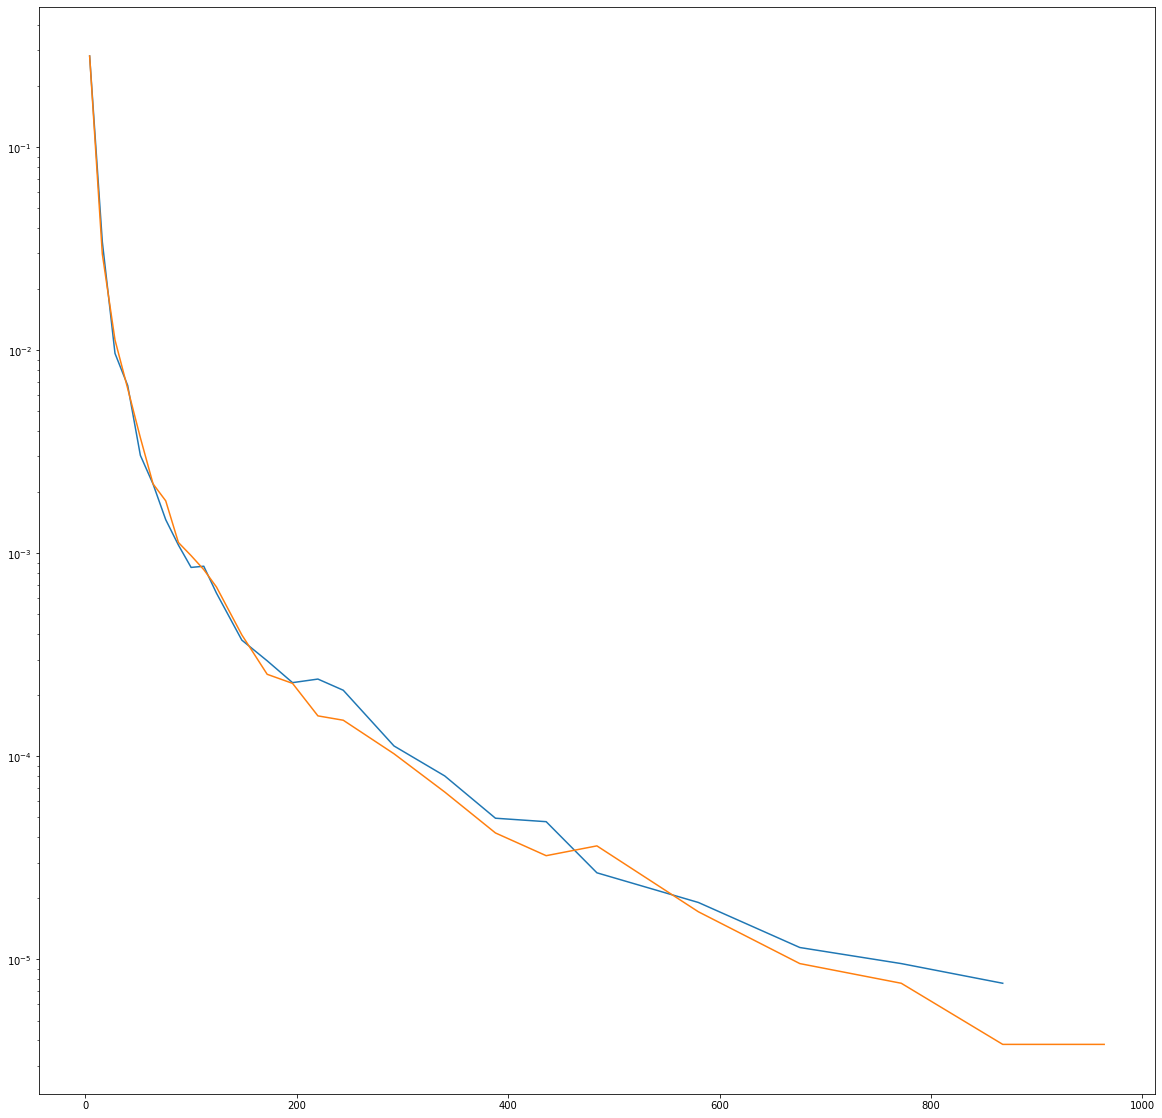

In [8]:
plt.figure(figsize=(20,20))
plt.yscale("log")
for tup in data:
    plt.plot(tup[0],tup[1])
plt.show()